### <center>Zaskia Elvina Dewi</center>
#### <center>F1D022163</center>

# Here you can put your extraordinary code

# MODUL 4 DETEKSI TEPI DAN PERBAIKAN KUALITAS CITRA

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 

Code diatas merupakan beberapa library yang digunakan untuk mengimport fungsi-fungsi tertentu seperti (1). matplotlib digunakan untuk menampilkan gambar. (2) numpy untuk operasi matematika pada array. (3) cv2 digunakan untuk pengolahan gambar

Code dibawah menggunakan OpenCV (cv2) untuk membaca gambar dari path yang ditentukan dan disimpan dalam variabel 'img1', kemudian mengonversi gambar tersebut ke citra keabuan (grayscale) menggunakan fungsi cv2.cvtColor(), dan hasilnya disimpan dalam variabel img.
Menampilkan citra grayscale menggunakan plt.imshow() dengan pilihan peta warna (colormap) "gray" dan mencetak array numpy yang mewakili citra grayscale menggunakan fungsi 'print(img)'.

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]]


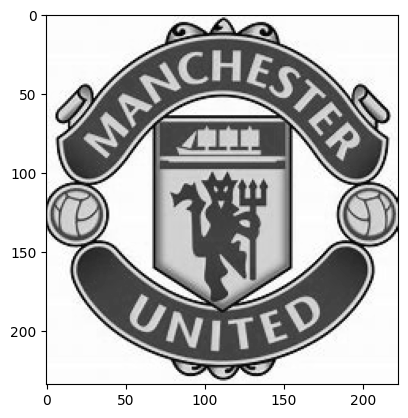

In [143]:
img1 = cv2.imread(r'C:\Users\Lenovo\OneDrive\Desktop\SEMESTER 4\PCD\PRAKTIKUM PCD\MODUL 4\modul-4-jurnal-zaskia298\assets\manchester_united.jpeg')
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = "gray")
print(img)

In [144]:
#convolution
def conv(img,kernel):
    h_img, w_img = img.shape
    h_ker,w_ker  = kernel.shape
    
    h_center = ((h_ker-1)//2)
    w_center = ((w_ker - 1)//2)
    
    h_res = h_img
    w_res = w_img
    
    #mendapatkan ukuran padding 
    l_pad = w_center
    #left padding
    r_pad = w_ker - w_center
    #right padding
    t_pad = h_center
    #top padding
    b_pad = h_ker - h_center
    #bottom padding
    
    arr = np.pad(img,((l_pad,r_pad),(t_pad,b_pad)), mode = 'edge')

    result = np.zeros((h_res,w_res))
    
    #perulangan di bawah  ini dilakukan untuk melakukan proses konvolusi 
    for i in range(h_res):
        for j in range (w_res):
            #variabel temp digunakan untuk menampung hasil sum of product 
            temp = 0
            for k in range (h_ker):
                for l in range (w_ker):
                    temp+= arr[i+k,j+l]* kernel[k,l]
            result[i,j] = temp
    return  result

Code diatas merupakan implementasi fungsi `conv()` untuk melakukan operasi konvolusi pada citra `img` dengan kernel `kernel`. Pertama, code mengambil dimensi citra dan kernel. Kemudian, code menghitung posisi tengah kernel untuk keperluan padding. Selanjutnya, code melakukan padding pada citra menggunakan nilai tepi (mode 'edge') dan menyimpan hasilnya dalam array `arr`. Code kemudian membuat array kosong `result` dengan ukuran yang sama dengan citra hasil konvolusi. Setelah itu, dilakukan perulangan untuk menghitung hasil konvolusi pada setiap titik citra menggunakan operasi sum of product. Hasil konvolusi disimpan dalam array `result` dan dikembalikan sebagai output fungsi.

## Mean Filtering

In [145]:
def filtering(img,w_ker,h_ker,op):
    h_img, w_img = img.shape
    size = w_ker*h_ker
    
    h_center = ((h_ker-1)//2)
    w_center = ((w_ker - 1)//2)
    
    #mendapatkan ukuran padding 
    l_pad = w_center
    #left padding
    r_pad = w_ker - w_center
    #right padding
    t_pad = h_center
    #top padding
    b_pad = h_ker - h_center
    #bottom padding
    arr = np.pad(img,((l_pad,r_pad),(t_pad,b_pad)), mode = 'constant')
    
    result = np.zeros((h_img,w_img))
    
    temp = np.zeros((h_ker,w_ker)).astype(int)
     
    #perulangan dilakukan untuk melakukan proses padding
    for i in range(h_img):
        for j in range (w_img):
            #perulangan k dan l menyesuaikan dengan besaran kernel
            for k in range (h_ker):
                for l in range (w_ker):
                    temp[k,l]= arr[i+k,j+l]                
            if (op == "mean"):
                res = mean_filtering(temp)
            elif (op == "median"):
                res = median_filtering(temp)
            else:
                res = modus_filtering(temp)
            result[i,j] = res
    return result

Code diatas merupakan implementasi fungsi `filtering()` yang digunakan untuk melakukan filtering pada citra. Fungsi ini menerima citra `img`, ukuran kernel `w_ker` dan `h_ker`, serta operator `op` untuk jenis filtering yang akan dilakukan. Pertama, code mengambil dimensi citra dan menghitung ukuran kernel. Kemudian, code menghitung posisi tengah kernel untuk keperluan padding. Dilakukan padding pada citra menggunakan mode 'constant' dengan nilai tepi yang sama dengan kernel. Array `result` dibuat kosong dengan ukuran yang sama dengan citra. Selanjutnya, dilakukan perulangan untuk memproses setiap titik citra dengan mengambil subarray sesuai ukuran kernel. Bergantung pada operator yang dipilih, akan dilakukan fungsi filtering seperti mean, median, atau modus pada subarray tersebut. Hasil filtering disimpan dalam array `result` dan dikembalikan sebagai output fungsi.

In [146]:
def mean_filtering(arr):
    mean = 0
    for i in range (arr.shape[0]):
        for j in range (arr.shape[1]):
            mean+=arr[i][j]
    mean /= arr.shape[0]*arr.shape[1]
    return mean

Code diatas merupakan implementasi fungsi `mean_filtering()` yang digunakan untuk melakukan filtering rata-rata pada suatu array `arr`. Fungsi ini melakukan perulangan untuk menghitung total nilai pada setiap elemen array. Nilai rata-rata dihitung dengan membagi total nilai dengan jumlah elemen array. Hasil rata-rata dikembalikan sebagai output fungsi.

## Median Filtering

In [147]:
def median_filtering(arr):
    #2d matix to 1d matrix
    temp = arr.flatten()
    #sorting ascending order
    temp.sort()
    #find median position
    mid = len(temp)//2
    #condition
    if(len(temp)%2 == 0):
        median = (temp[mid-1] + temp[mid]/2)
    else:
        median = temp[mid]
    #return result
    return median

Code diatas merupakan implementasi fungsi `median_filtering()` yang digunakan untuk melakukan filtering median pada suatu array `arr`. Pertama, array 2D `arr` diubah menjadi array 1D menggunakan fungsi `flatten()`. Kemudian, array tersebut diurutkan secara ascending menggunakan fungsi `sort()`. Posisi median dihitung dengan membagi panjang array dengan 2. Jika panjang array genap, median dihitung sebagai rata-rata dari dua nilai di tengah. Jika panjang array ganjil, median diambil sebagai nilai di tengah. Nilai median dikembalikan sebagai output fungsi.

## Modus Filtering

In [148]:
def modus_filtering(arr):
    #mencari banyaknya kemunculan tiap pixel
    occurance = np.zeros(256)
    for i in range (arr.shape[0]):
        for j in range (arr.shape[1]):
            occurance[arr[i,j]] += 1
            
    max_occ = 0
    modus = 0
    
    #mencari pixel dengan frekuensi kemunculan tert4ringgi
    for i in range (len(occurance)):
        if(occurance[i]>max_occ):
            modus = i
            max_occ = occurance[i]
            
    return modus

Code diatas merupakan implementasi fungsi `modus_filtering()` yang digunakan untuk melakukan filtering modus pada suatu array `arr`. Fungsi ini pertama-tama membuat array `occurance` dengan ukuran 256 yang digunakan untuk menghitung kemunculan tiap nilai piksel dalam array. Dilakukan perulangan untuk mengiterasi setiap elemen array `arr` dan mengupdate nilai kemunculan pada array `occurance`. Selanjutnya, dilakukan perulangan untuk mencari nilai piksel dengan frekuensi kemunculan tertinggi. Jika frekuensi kemunculan suatu nilai piksel lebih besar dari `max_occ`, maka nilai modus dan `max_occ` diperbarui. Nilai modus dikembalikan sebagai output fungsi.

## Sharpening dan Smoothing

Code dibawah merupakan implementasi pengolahan citra menggunakan beberapa teknik. Pertama, citra `img` dihaluskan menggunakan Gaussian Blur dengan kernel size 3x3 untuk mengurangi noise dan efek semburat. Selanjutnya, dilakukan deteksi tepi menggunakan filter Laplacian. Hasilnya diubah menjadi nilai absolut dan tipe data uint8. Untuk melakukan penguatan tepi, hasil Laplacian ditambahkan dengan citra asli menggunakan fungsi `addWeighted()` dengan bobot tertentu. Hasil-hasil pengolahan citra ditampilkan dalam satu plot menggunakan library matplotlib. Gambar pertama menampilkan citra asli, gambar kedua menampilkan citra yang telah dihaluskan, dan gambar ketiga menampilkan citra yang telah diperkuat tepinya.

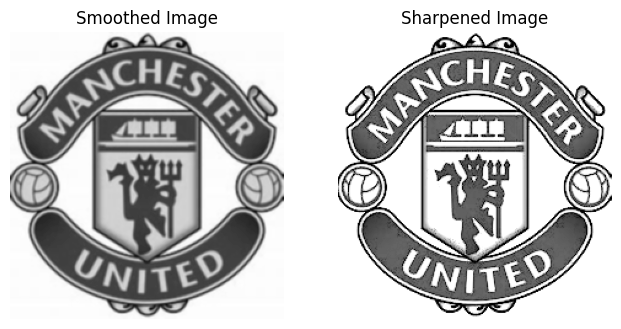

In [149]:
smoothed_image = cv2.GaussianBlur(img, (3, 3), 0) 

laplacian = cv2.Laplacian(img, cv2.CV_64F)

laplacian = np.uint8(np.absolute(laplacian))

sharpened_image = cv2.addWeighted(img, 1.5, laplacian, -0.5, 0)

# Display the results
plt.figure(figsize=(12, 6))

# plt.subplot(1, 3, 1)
# plt.imshow(img, cmap='gray')
# plt.title('Original Image')
# plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.show()


## Sobel

In [150]:
def sobel(img):
    gx = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    gy = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    
    x = conv(img, gx)
    x = np.sqrt(x*x)
    y = conv(img, gy)
    y = np.sqrt(y*y)
    
    gradient = abs(x)+abs(y)
    
    display(img, gradient, "Sobel")  # Menggunakan img sebagai input untuk display
    
    return gradient

Code diatas merupakan implementasi fungsi `sobel()` yang digunakan untuk melakukan deteksi tepi menggunakan operator Sobel pada citra `img`. Pertama, dilakukan inisialisasi kernel `gx` dan `gy` untuk operasi konvolusi. Selanjutnya, citra `img` dilakukan konvolusi dengan kernel `gx` dan `gy` menggunakan fungsi `conv()`. Hasil konvolusi pada masing-masing sumbu x dan y dihitung magnitudonya dengan mengkuadratkan dan mengambil akar kuadrat dari masing-masing hasil. Kemudian, dilakukan penjumlahan absolut dari kedua hasil untuk mendapatkan citra hasil deteksi tepi. Hasil deteksi tepi ditampilkan menggunakan fungsi `display()`, dan citra tersebut juga dikembalikan sebagai output fungsi.

In [151]:
def sobel(img):
    gx = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    gy = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    
    x = conv(img, gx)
    x = np.sqrt(x*x)
    y = conv(img, gy)
    y = np.sqrt(y*y)
    
    gradient = abs(x) + abs(y)
    
    display(img, x, y, gradient, gradient, gradient, gradient, gradient, "sobel")
    
    return gradient

Code diatas merupakan implementasi fungsi `sobel()` yang melakukan deteksi tepi menggunakan operator Sobel pada citra `img`. Pertama, dilakukan inisialisasi kernel `gx` dan `gy` untuk operasi konvolusi. Selanjutnya, citra `img` dilakukan konvolusi dengan kernel `gx` dan `gy` menggunakan fungsi `conv()`. Hasil konvolusi pada sumbu x dan y dihitung magnitudonya dengan mengkuadratkan dan mengambil akar kuadrat dari masing-masing hasil. Selanjutnya, dilakukan penjumlahan absolut dari kedua hasil untuk mendapatkan citra hasil deteksi tepi. Terakhir, dilakukan pemanggilan fungsi `display()` untuk menampilkan citra asli, hasil konvolusi sumbu x, hasil konvolusi sumbu y, dan citra hasil deteksi tepi. Citra hasil deteksi tepi juga dikembalikan sebagai output dari fungsi.

## Prewitt

In [152]:
def prewitt(img):
    gx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    gy = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
    
    x = conv(img, gx)
    x = np.sqrt(x*x)
    y = conv(img, gy)
    y = np.sqrt(y*y)
    
    gradient = abs(x)+abs(y)
    
    display(img, x, y, gradient, gradient, gradient, gradient, gradient, "Prewitt")
    
    return gradient

Code diatas merupakan implementasi fungsi `prewitt()` yang melakukan deteksi tepi menggunakan operator Prewitt pada citra `img`. Pertama, dilakukan inisialisasi kernel `gx` dan `gy` untuk operasi konvolusi. Selanjutnya, citra `img` dilakukan konvolusi dengan kernel `gx` dan `gy` menggunakan fungsi `conv()`. Hasil konvolusi pada sumbu x dan y dihitung magnitudonya dengan mengkuadratkan dan mengambil akar kuadrat dari masing-masing hasil. Selanjutnya, dilakukan penjumlahan absolut dari kedua hasil untuk mendapatkan citra hasil deteksi tepi. Terakhir, dilakukan pemanggilan fungsi `display()` untuk menampilkan citra asli, hasil konvolusi sumbu x, hasil konvolusi sumbu y, dan citra hasil deteksi tepi. Citra hasil deteksi tepi juga dikembalikan sebagai output dari fungsi.

## Robert

In [153]:
def roberts(img):
    gx = np.array([[0,1],[0,-1]])
    gy = np.array([[0,0],[1,-1]])
    
    x = conv(img, gx)
    x = np.sqrt(x*x)
    y = conv(img, gy)
    y = np.sqrt(y*y)
    
    gradient = abs(x)+abs(y)
    
    display(img, x, y, gradient, gradient, gradient, gradient, gradient, "Roberts")
    
    return gradient

Code diatas merupakan implementasi fungsi `roberts()` yang melakukan deteksi tepi menggunakan operator Roberts pada citra `img`. Pertama, dilakukan inisialisasi kernel `gx` dan `gy` untuk operasi konvolusi. Selanjutnya, citra `img` dilakukan konvolusi dengan kernel `gx` dan `gy` menggunakan fungsi `conv()`. Hasil konvolusi pada sumbu x dan y dihitung magnitudonya dengan mengkuadratkan dan mengambil akar kuadrat dari masing-masing hasil. Selanjutnya, dilakukan penjumlahan absolut dari kedua hasil untuk mendapatkan citra hasil deteksi tepi. Terakhir, dilakukan pemanggilan fungsi `display()` untuk menampilkan citra asli, hasil konvolusi sumbu x, hasil konvolusi sumbu y, dan citra hasil deteksi tepi. Citra hasil deteksi tepi juga dikembalikan sebagai output dari fungsi.

In [154]:
def display(img1, img2, img3, img4, img5, img6, img7, img8, text):
    f, ax = plt.subplots(2, 4, figsize=(12, 8))
    
    ax[0, 0].imshow(img1, cmap='gray')
    ax[0, 0].set_title(text[0])
    ax[0, 0].axis('off')
    
    ax[0, 1].imshow(img2, cmap='gray')
    ax[0, 1].set_title(text[1])
    ax[0, 1].axis('off')
    
    ax[0, 2].imshow(img3, cmap='gray')
    ax[0, 2].set_title(text[2])
    ax[0, 2].axis('off')
    
    ax[0, 3].imshow(img4, cmap='gray')
    ax[0, 3].set_title(text[3])
    ax[0, 3].axis('off')
    
    ax[1, 0].imshow(img5, cmap='gray')
    ax[1, 0].set_title(text[4])
    ax[1, 0].axis('off')
    
    ax[1, 1].imshow(img6, cmap='gray')
    ax[1, 1].set_title(text[5])
    ax[1, 1].axis('off')
    
    ax[1, 2].imshow(img7, cmap='gray')
    ax[1, 2].set_title(text[6])
    ax[1, 2].axis('off')
    
    ax[1, 3].imshow(img8, cmap='gray')
    ax[1, 3].set_title(text[7])
    ax[1, 3].axis('off')

    plt.tight_layout()
    plt.show()


Code dibawah merupakan implementasi fungsi `display()` yang digunakan untuk menampilkan hasil pengolahan citra dalam bentuk subplot. Fungsi ini menerima beberapa citra hasil pengolahan (`img1`, `img2`, `img3`, ..., `img8`) serta array teks (`text`) yang berisi judul untuk setiap citra yang akan ditampilkan. 
Fungsi `display()` akan membuat sebuah figure dengan ukuran 2x4 (2 baris, 4 kolom) menggunakan `plt.subplots()`. Selanjutnya, citra-citra hasil pengolahan akan ditampilkan pada masing-masing subplot menggunakan `imshow()`. Setiap subplot akan diberi judul sesuai dengan teks yang terdapat dalam array `text`.  Terakhir, fungsi `display()` akan menampilkan plot dengan menggunakan `plt.show()`. Plot akan menampilkan citra-citra hasil pengolahan secara berdampingan dalam subplot yang tersusun rapi.

# Menampilkan hasil perbaikan kualitas Citra

Code dibawah menggunakan fungsi display() untuk menampilkan beberapa citra hasil pengolahan. Setiap citra hasil pengolahan disimpan dalam variabel img1, img2, img3, ..., img8. Variabel text berisi judul untuk setiap citra yang akan ditampilkan. Kemudian, fungsi display() dipanggil dengan argumen citra-citra hasil pengolahan dan teks judul. Hasil pengolahan citra tersebut akan ditampilkan dalam subplot yang tersusun rapi sesuai dengan judul masing-masing.

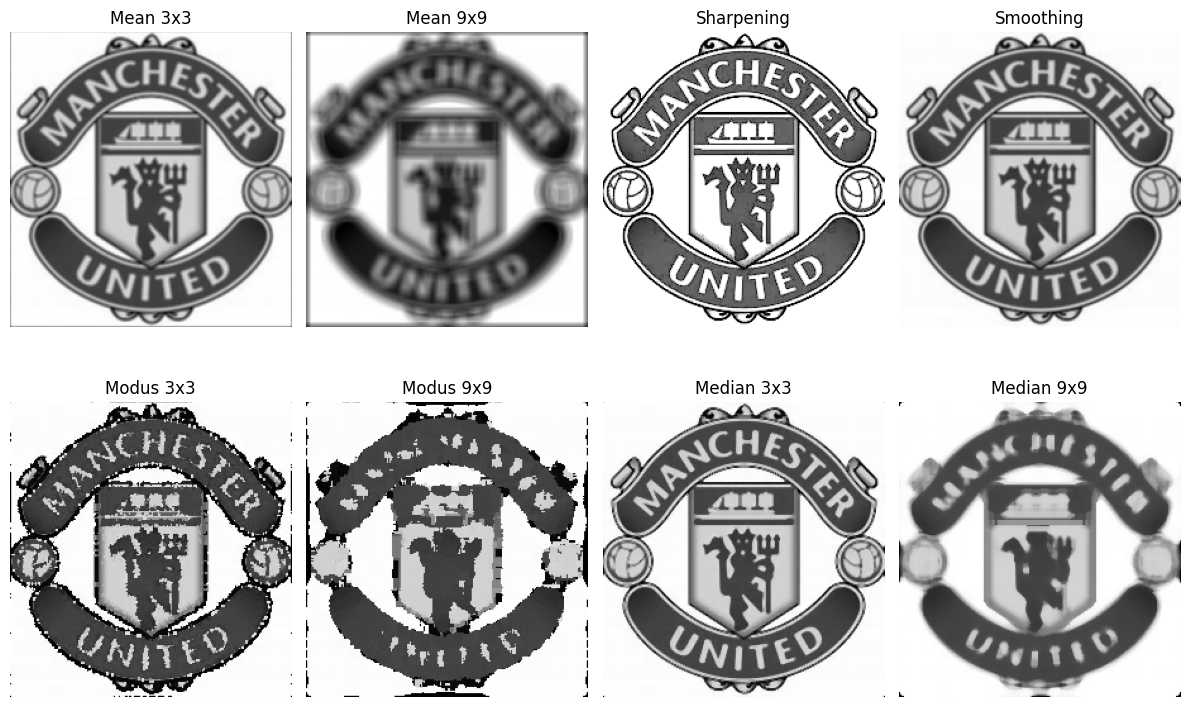

In [155]:
# display(filtering(img,3,3,"mean"),filtering(img,9,9,"mean"),filtering(img,3,3,"median"),filtering(img,9,9,"median"),filtering(img,3,3,"modus"),filtering(img,9,9,"modus"),smoothed_image,sharpened_image,"Mean 3x3")

# fungsi display
img1 = filtering(img, 3, 3, "mean")
img2 = filtering(img, 9, 9, "mean")
img3 = sharpened_image
img4 = smoothed_image
img5 = filtering(img, 3, 3, "modus")
img6 = filtering(img, 9, 9, "modus")
img7 = filtering(img, 3, 3, "median")
img8 = filtering(img, 9, 9, "median")
text = ['Mean 3x3', 'Mean 9x9', 'Sharpening', 'Smoothing', 'Modus 3x3', 'Modus 9x9', 'Median 3x3', 'Median 9x9']

display(img1, img2, img3, img4, img5, img6, img7, img8, text)

In [163]:
# gx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
# gy = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

In [176]:
prewitt_mean_3x3 = np.abs(conv(img1, gx)) + np.abs(conv(img1, gy))
prewitt_mean_9x9 = np.abs(conv(img2, gx)) + np.abs(conv(img2, gy))
prewitt_sharpening = np.abs(conv(img3, gx)) + np.abs(conv(img3, gy))
prewitt_smoothing = np.abs(conv(img4, gx)) + np.abs(conv(img4, gy))
prewitt_modus_3x3 = np.abs(conv(img5, gx)) + np.abs(conv(img5, gy))
prewitt_modus_9x9 = np.abs(conv(img6, gx)) + np.abs(conv(img6, gy))
prewitt_median_3x3 = np.abs(conv(img7, gx)) + np.abs(conv(img7, gy))
prewitt_median_9x9 = np.abs(conv(img8, gx)) + np.abs(conv(img8, gy))

Code di atas mengimplementasikan operator Prewitt untuk berbagai jenis perbaikan yang telah dilakukan sebelumnya. Operator Prewitt digunakan untuk mendeteksi tepi pada citra dengan memperhitungkan perbedaan intensitas piksel di sekitarnya. Pada setiap langkahnya, kode tersebut menghitung gradien citra menggunakan filter Prewitt secara horizontal (gx) dan vertikal (gy), kemudian menjumlahkan nilai absolut hasil kedua filter tersebut. Hasilnya adalah citra tepi yang dihasilkan oleh operator Prewitt untuk masing-masing jenis perbaikan yang telah dilakukan sebelumnya.

Pada code dibawah, diketahui bahwa variabel `text` berisi daftar teks yang akan digunakan sebagai label untuk setiap citra yang akan ditampilkan. Kemudian, fungsi `display` digunakan untuk menampilkan citra-citra tepi yang dihasilkan oleh operator Prewitt untuk setiap jenis perbaikan yang telah dilakukan sebelumnya. Citra-citra tersebut termasuk Prewitt Mean 3x3, Prewitt Mean 9x9, Prewitt Sharpening, Prewitt Smoothing, Prewitt Modus 3x3, Prewitt Modus 9x9, Prewitt Median 3x3, dan Prewitt Median 9x9. Hasilnya akan ditampilkan dalam satu tampilan yang berisi citra-citra tersebut beserta label-labelnya.

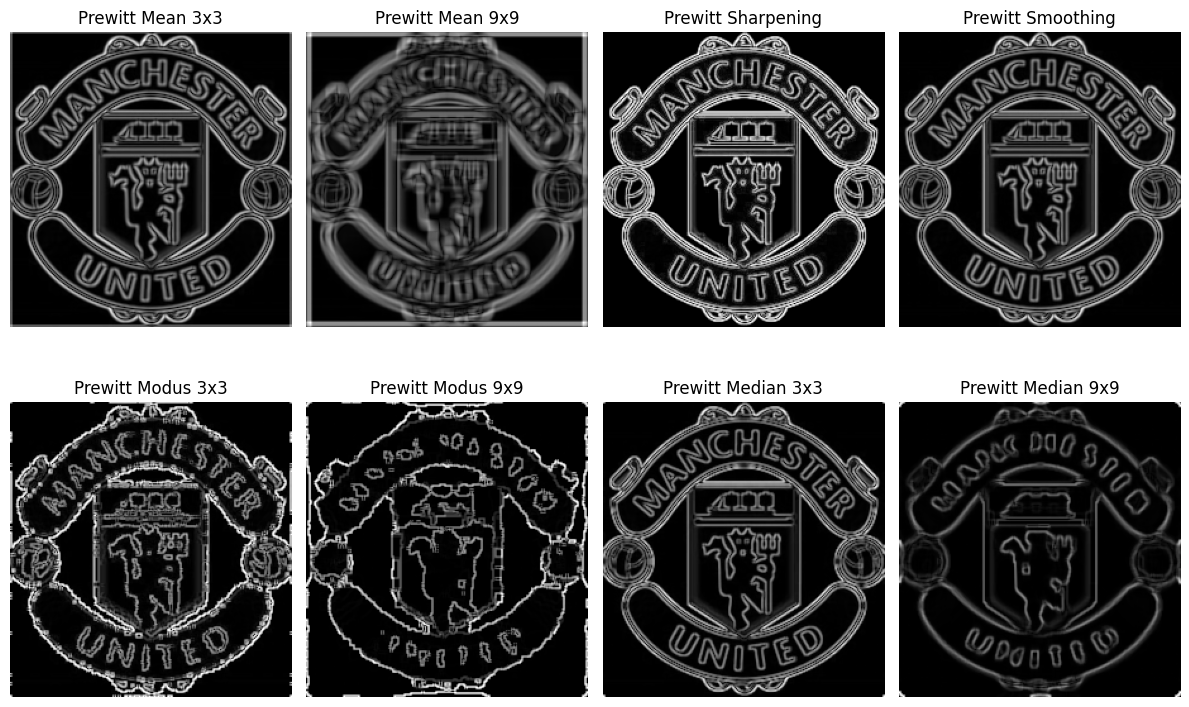

In [166]:
text = ['Prewitt Mean 3x3', 'Prewitt Mean 9x9', 'Prewitt Sharpening', 'Prewitt Smoothing',
        'Prewitt Modus 3x3', 'Prewitt Modus 9x9', 'Prewitt Median 3x3', 'Prewitt Median 9x9']

display(prewitt_mean_3x3, prewitt_mean_9x9, prewitt_sharpening, prewitt_smoothing,
        prewitt_modus_3x3, prewitt_modus_9x9, prewitt_median_3x3, prewitt_median_9x9, text)

In [177]:
# gx = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
# gy = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])

In [178]:
sobel_mean_3x3 = np.abs(conv(img1, gx)) + np.abs(conv(img1, gy))
sobel_mean_9x9 = np.abs(conv(img2, gx)) + np.abs(conv(img2, gy))
sobel_sharpening = np.abs(conv(img3, gx)) + np.abs(conv(img3, gy))
sobel_smoothing = np.abs(conv(img4, gx)) + np.abs(conv(img4, gy))
sobel_modus_3x3 = np.abs(conv(img5, gx)) + np.abs(conv(img5, gy))
sobel_modus_9x9 = np.abs(conv(img6, gx)) + np.abs(conv(img6, gy))
sobel_median_3x3 = np.abs(conv(img7, gx)) + np.abs(conv(img7, gy))
sobel_median_9x9 = np.abs(conv(img8, gx)) + np.abs(conv(img8, gy))

Code di atas mengimplementasikan operator Sobel untuk berbagai jenis perbaikan yang telah dilakukan sebelumnya. Operator Sobel digunakan untuk mendeteksi tepi pada citra dengan memperhitungkan perbedaan intensitas piksel di sekitarnya. Pada setiap langkahnya, kode tersebut menghitung gradien citra menggunakan filter Sobel secara horizontal (gx) dan vertikal (gy), kemudian menjumlahkan nilai absolut hasil kedua filter tersebut. Hasilnya adalah citra tepi yang dihasilkan oleh operator Sobel untuk masing-masing jenis perbaikan yang telah dilakukan sebelumnya.

Pada code dibawah, diketahui bahwa variabel `text` berisi daftar teks yang akan digunakan sebagai label untuk setiap citra yang akan ditampilkan. Kemudian, fungsi `display` digunakan untuk menampilkan citra-citra tepi yang dihasilkan oleh operator Sobel untuk setiap jenis perbaikan yang telah dilakukan sebelumnya. Citra-citra tersebut termasuk Sobel Mean 3x3, Sobel Mean 9x9, Sobel Sharpening, Sobel Smoothing, Sobel Modus 3x3, Sobel Modus 9x9, Sobel Median 3x3, dan Sobel Median 9x9. Hasilnya akan ditampilkan dalam satu tampilan yang berisi citra-citra tersebut beserta label-labelnya.

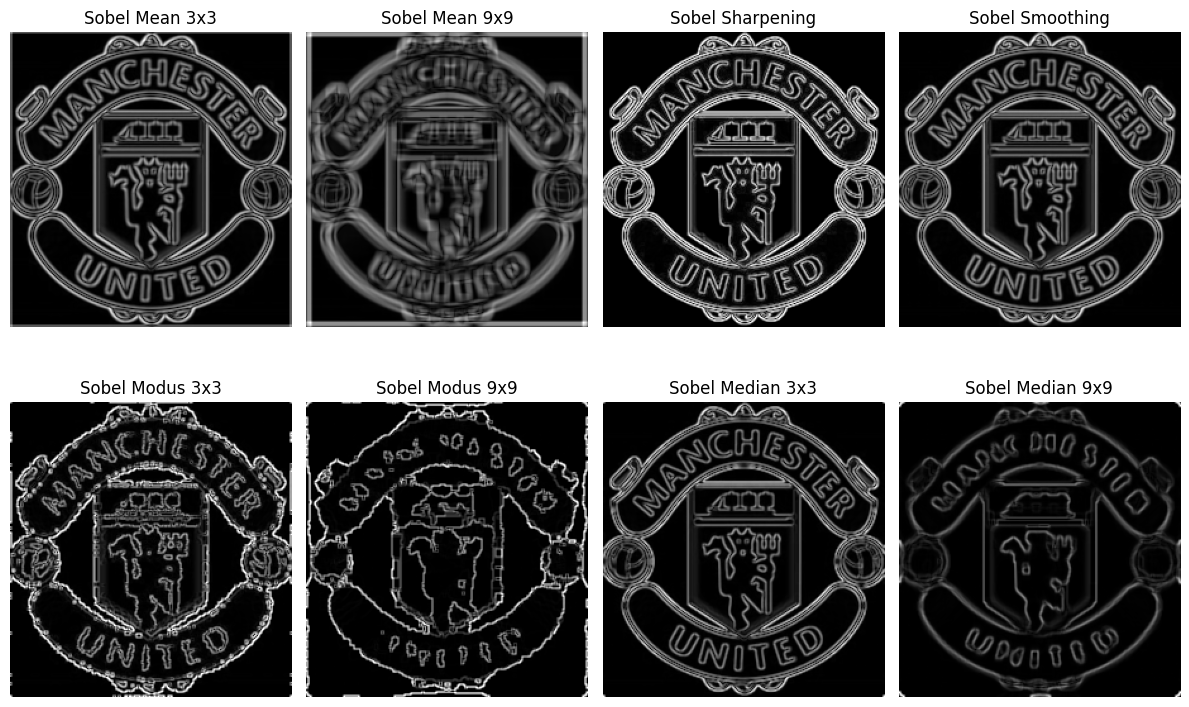

In [171]:
text = ['Sobel Mean 3x3', 'Sobel Mean 9x9', 'Sobel Sharpening', 'Sobel Smoothing',
        'Sobel Modus 3x3', 'Sobel Modus 9x9', 'Sobel Median 3x3', 'Sobel Median 9x9']

display(sobel_mean_3x3, sobel_mean_9x9, sobel_sharpening, sobel_smoothing,
        sobel_modus_3x3, sobel_modus_9x9, sobel_median_3x3, sobel_median_9x9, text)

In [172]:
# gx = np.array([[0,1],[0,-1]])
# gy = np.array([[0,0],[1,-1]])

In [174]:
robert_mean_3x3 = np.abs(conv(img1, gx)) + np.abs(conv(img1, gy))
robert_mean_9x9 = np.abs(conv(img2, gx)) + np.abs(conv(img2, gy))
robert_sharpening = np.abs(conv(img3, gx)) + np.abs(conv(img3, gy))
robert_smoothing = np.abs(conv(img4, gx)) + np.abs(conv(img4, gy))
robert_modus_3x3 = np.abs(conv(img5, gx)) + np.abs(conv(img5, gy))
robert_modus_9x9 = np.abs(conv(img6, gx)) + np.abs(conv(img6, gy))
robert_median_3x3 = np.abs(conv(img7, gx)) + np.abs(conv(img7, gy))
robert_median_9x9 = np.abs(conv(img8, gx)) + np.abs(conv(img8, gy))

Code di atas mengimplementasikan operator Robert untuk berbagai jenis perbaikan yang telah dilakukan sebelumnya. Operator Robert digunakan untuk mendeteksi tepi pada citra dengan memperhitungkan perbedaan intensitas piksel di sekitarnya. Pada setiap langkahnya, kode tersebut menghitung gradien citra menggunakan filter Robert secara horizontal (gx) dan vertikal (gy), kemudian menjumlahkan nilai absolut hasil kedua filter tersebut. Hasilnya adalah citra tepi yang dihasilkan oleh operator Robert untuk masing-masing jenis perbaikan yang telah dilakukan sebelumnya.

Pada code dibawah, diketahui bahwa variabel `text_robert` berisi daftar teks yang akan digunakan sebagai label untuk setiap citra yang akan ditampilkan. Kemudian, fungsi `display` digunakan untuk menampilkan citra-citra tepi yang dihasilkan oleh operator Robert untuk setiap jenis perbaikan yang telah dilakukan sebelumnya. Citra-citra tersebut termasuk Robert Mean 3x3, Robert Mean 9x9, Robert Sharpening, Robert Smoothing, Robert Modus 3x3, Robert Modus 9x9, Robert Median 3x3, dan Robert Median 9x9. Hasilnya akan ditampilkan dalam satu tampilan yang berisi citra-citra tersebut beserta label-labelnya.

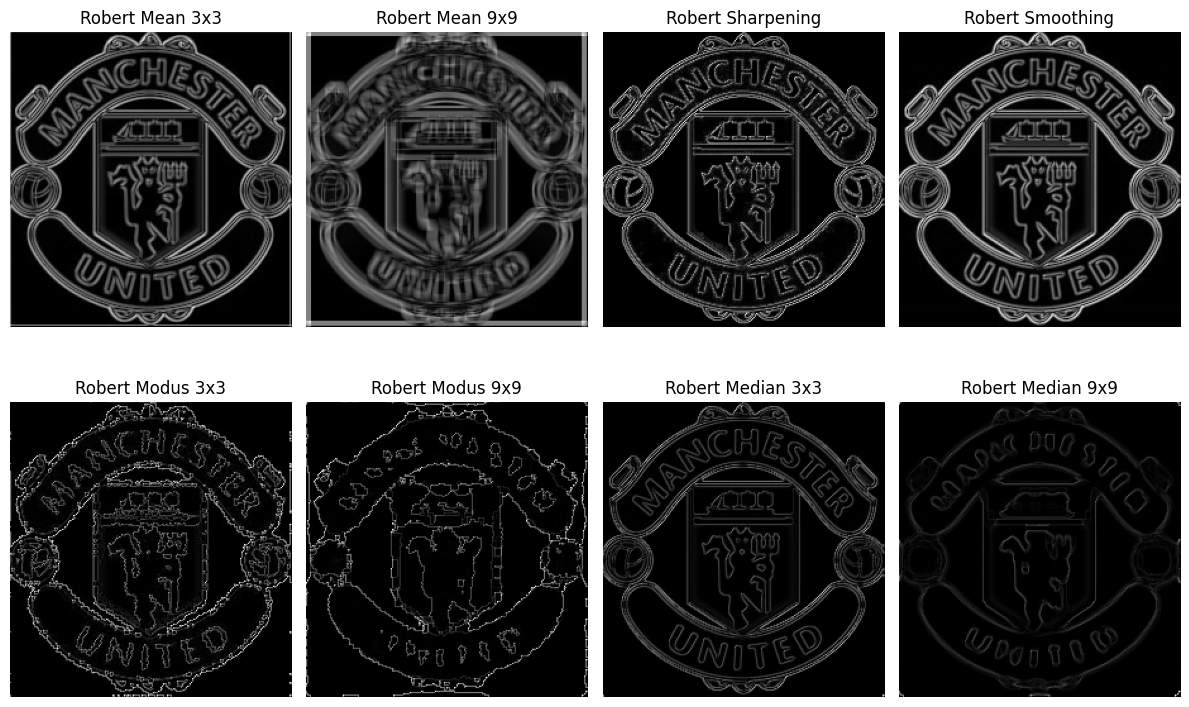

In [175]:
text_robert = ['Robert Mean 3x3', 'Robert Mean 9x9', 'Robert Sharpening', 'Robert Smoothing', 'Robert Modus 3x3', 'Robert Modus 9x9', 'Robert Median 3x3', 'Robert Median 9x9']

display(robert_mean_3x3, robert_mean_9x9, robert_sharpening, robert_smoothing, robert_modus_3x3, robert_modus_9x9, robert_median_3x3, robert_median_9x9, text_robert)